## 製作video

In [5]:
!rm -rf log
!rm -rf records
!rm -rf analyzed_records
!rm -rf analyzed_records-video.mp4
!rm -rf records-video.mp4
!tar -xzvf log.tar.gz   >/dev/null 2>&1
!ffmpeg  -framerate 5  -i records/%05d.webp records-video.mp4
!ffmpeg  -framerate 5  -i analyzed_records/%05d.webp analyzed_records-video.mp4


ffmpeg version 5.0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 13.1.6 (clang-1316.0.21.2)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/5.0.1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack --disable-indev=jack --enable-videotoolbox
  

## 加載運動log
###  安裝相依庫
* pip3 install numpy
* pip3 install pandas
* pip3 install opencv-python
* pip3 install matplotlib

In [19]:
import numpy as np
import pandas as pd

def loadLog(tgz):
    !rm -rf records
    !rm -rf analyzed_records
    !tar -xzvf log.tar.gz  >/dev/null 2>&1
    df = pd.read_csv('carlog.csv')
    return(df)

def getActionNum(df):
    columnNames=df.columns
    #print(columnNames)
    columnNum=len(columnNames)
    FIXNum=7
    #print(columnNum)
    actionNumber=int((columnNum-FIXNum)/3)
    return actionNumber

def getActionArray(row, actionNumber):
    actionArray=np.zeros((actionNumber,3),dtype=float)
    for action in range(actionNumber):
        throttle="throttle_"+str(action)
        steer="steer_"+str(action)
        probability="probability_"+str(action)
        #print(row[throttle], row[steer], row[probability])
        actionArray[action,0]=row[throttle]
        actionArray[action,1]=row[steer]
        actionArray[action,2]=row[probability]  
    return actionArray



### 查詢動作空間
* 格式是 cm, degree, probability%
* 可以修改 LOOKAT 想看第幾個畫面的動作分析


In [24]:
LOOKAT=201
img_LOOKAT='records/00200.webp'
over_img_LOOKAT='analyzed_records/00200.webp'

df=loadLog('log.tar.gz')
#row=df.iloc[1541]
row=df.iloc[LOOKAT]
#print(raw)
actionNumber=10
actionArray=getActionArray(row, actionNumber)
actionArray[:,0]=actionArray[:,0]*100
actionArray[:,2]=actionArray[:,2]*100
actionArray=np.floor(actionArray)
print(actionArray)

[[ 80. -30.   0.]
 [ 80. -20.   0.]
 [160. -20.   0.]
 [ 80. -10.   8.]
 [160. -10.   1.]
 [ 80.   0.  15.]
 [160.   0.  15.]
 [240.   0.   9.]
 [ 80.  10.   0.]
 [160.  10.   0.]]


<IPython.core.display.Javascript object>


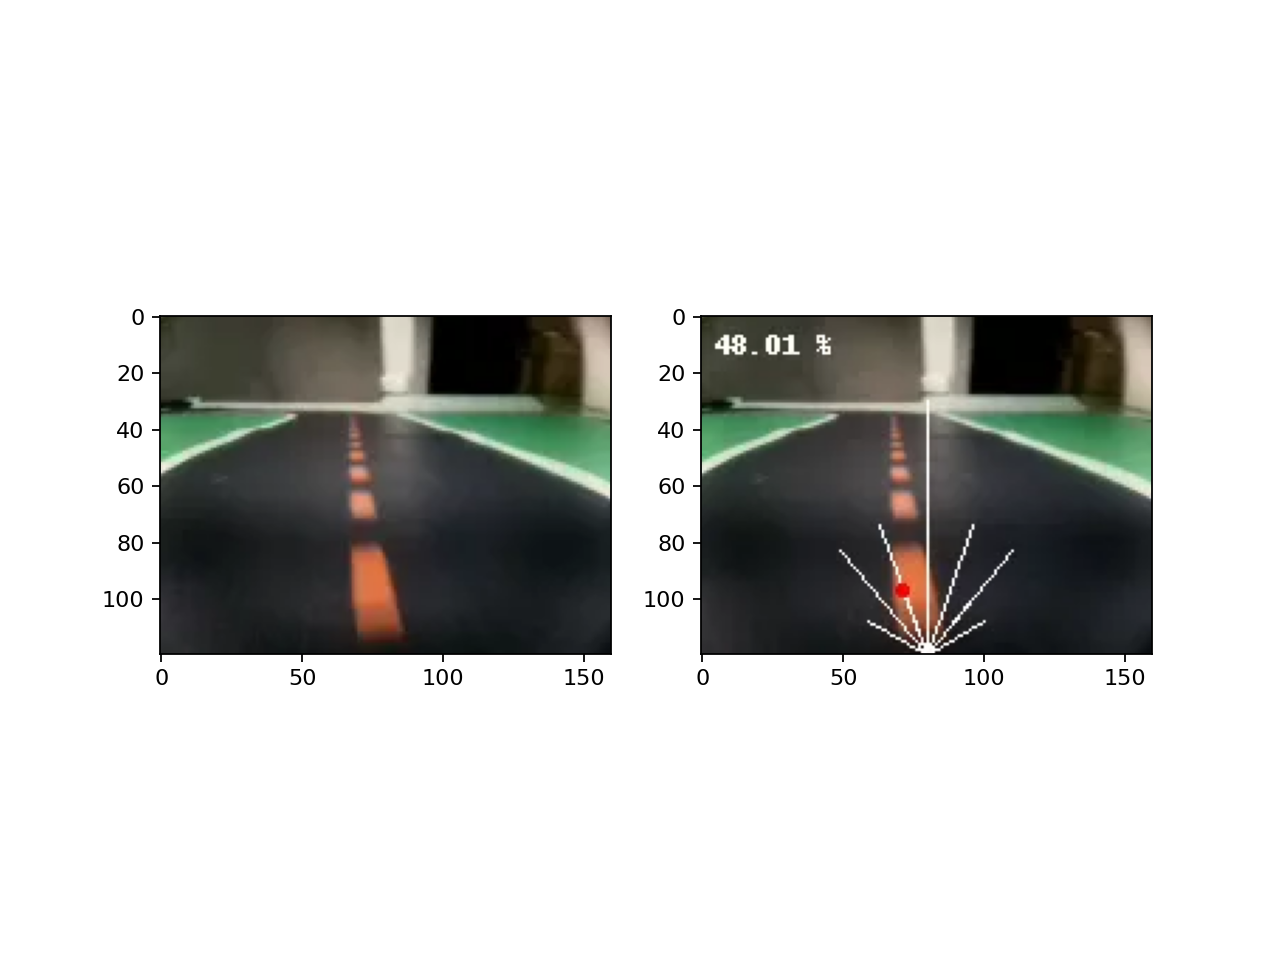

In [27]:
%matplotlib notebook
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as img
import math
from matplotlib.pyplot import figure


fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.add_subplot(121)
plt.ion()

img_org = img.imread(img_LOOKAT)
ax.imshow(img_org)
img_analysis=img.imread(over_img_LOOKAT)
ax = fig.add_subplot(122)
ax.imshow(img_analysis)